In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
import numpy as np

In [5]:
df = pd.read_csv('../data/cleaned.csv')


In [6]:
df["date"] = pd.to_datetime(df["date"])
df["day_of_week"] = df["date"].dt.dayofweek

In [7]:
df["day_of_week"] = df["date"].dt.dayofweek
print(df)

     Unnamed: 0       date  contest_num   word  num_results  num_hardmode  \
0             0 2022-12-31          560  manly        20380          1899   
1             1 2022-12-30          559  molar        21204          1973   
2             2 2022-12-29          558  havoc        20001          1919   
3             3 2022-12-28          557  impel        20160          1937   
4             4 2022-12-27          556  condo        20879          2012   
..          ...        ...          ...    ...          ...           ...   
354         354 2022-01-11          206  drink       153880          3017   
355         355 2022-01-10          205  query       107134          2242   
356         356 2022-01-09          204  gorge        91477          1913   
357         357 2022-01-08          203  crank       101503          1763   
358         358 2022-01-07          202  slump        80630          1362   

     in1  in2  in3  in4  ...  letter3  letter4  letter5  letter1_int  \
0  

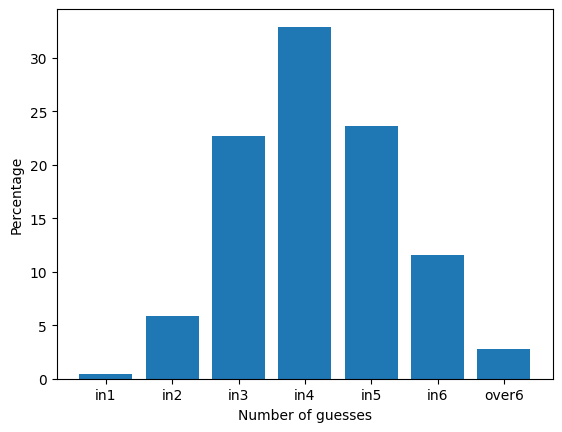

In [8]:
fig, ax = plt.subplots()

guesses = ['in1', 'in2', 'in3', 'in4', 'in5', 'in6', 'over6']

percentages = np.array([df['in1'], df['in2'], df['in3'], df['in4'], df['in5'], df['in6'], df['over6']])

ax.bar(guesses, percentages.mean(axis=1))

ax.set_xlabel('Number of guesses')
ax.set_ylabel('Percentage')


plt.show()

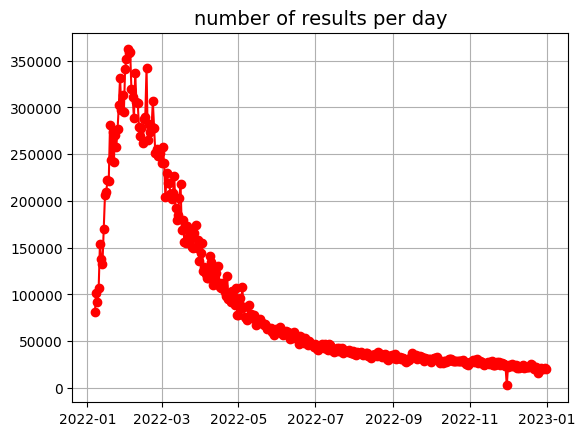

In [9]:
plt.plot(df['date'], df['num_results'], color='red', marker='o')
plt.title('number of results per day', fontsize=14)
plt.grid(True)
plt.show()


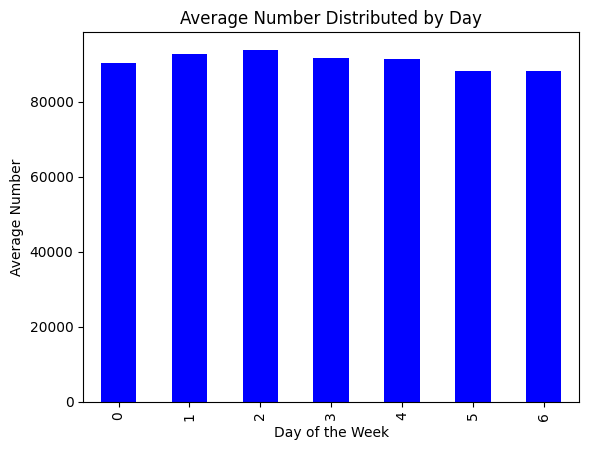

In [10]:
grouped = df.groupby('day_of_week')['num_results'].mean()

# Plot a bar chart with the grouped data
grouped.plot(kind='bar', color='blue')

# Add labels and title to the plot
plt.xlabel('Day of the Week')
plt.ylabel('Average Number')
plt.title('Average Number Distributed by Day')
plt.show()


In [11]:
from prophet import Prophet

df_numpeople_predict = df[["date", "num_results"]]
df_numpeople_predict.columns = ['ds', 'y']
m = Prophet()
m.fit(df_numpeople_predict)

future = m.make_future_dataframe(periods=365)

forecast = m.predict(future)
forecast.tail()



c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
16:59:53 - cmdstanpy - INFO - Chain [1] start processing
16:59:54 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
719,2023-12-27,-20975.979224,-9.828338e+05,1.025684e+06,-9.885268e+05,1.025342e+06,3214.369696,3214.369696,3214.369696,3214.369696,3214.369696,3214.369696,0.0,0.0,0.0,-17761.609528
720,2023-12-28,-21089.701089,-9.824374e+05,1.043903e+06,-9.914615e+05,1.030950e+06,1455.409403,1455.409403,1455.409403,1455.409403,1455.409403,1455.409403,0.0,0.0,0.0,-19634.291687
721,2023-12-29,-21203.422955,-1.003667e+06,1.030266e+06,-9.943961e+05,1.036848e+06,426.101618,426.101618,426.101618,426.101618,426.101618,426.101618,0.0,0.0,0.0,-20777.321337
722,2023-12-30,-21317.144820,-1.001857e+06,1.031960e+06,-9.971829e+05,1.042252e+06,-2460.785129,-2460.785129,-2460.785129,-2460.785129,-2460.785129,-2460.785129,0.0,0.0,0.0,-23777.929949
723,2023-12-31,-21430.866685,-1.001440e+06,1.052475e+06,-1.001852e+06,1.045991e+06,-3393.913594,-3393.913594,-3393.913594,-3393.913594,-3393.913594,-3393.913594,0.0,0.0,0.0,-24824.780280


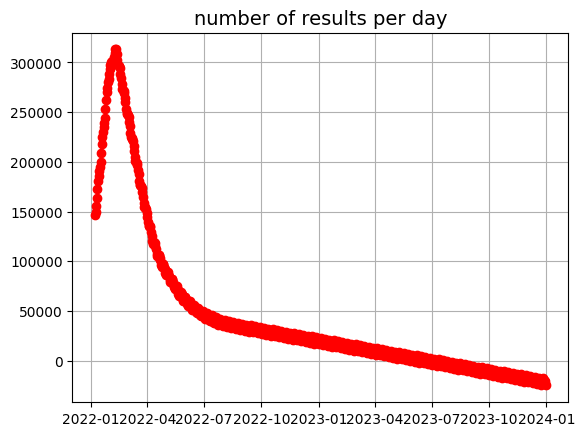

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
418,2023-03-01,13254.302233,-43256.844727,79355.017467,-46793.604047,73574.067924,3214.369696,3214.369696,3214.369696,3214.369696,3214.369696,3214.369696,0.0,0.0,0.0,16468.671929


In [12]:
plt.plot(forecast['ds'], forecast['yhat'], color='red', marker='o')
plt.title('number of results per day', fontsize=14)
plt.grid(True)
plt.show()

forecast[forecast.ds == "2023-03-01"]


16:59:54 - cmdstanpy - INFO - Chain [1] start processing
16:59:54 - cmdstanpy - INFO - Chain [1] done processing


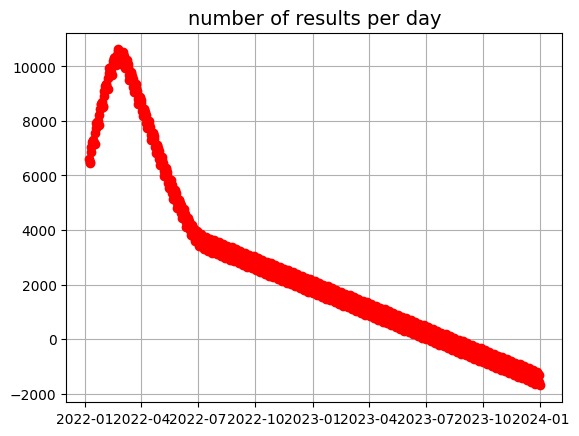

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
418,2023-03-01,1428.631998,-214.456152,3369.960567,477.025987,2502.782787,175.957446,175.957446,175.957446,175.957446,175.957446,175.957446,0.0,0.0,0.0,1604.589444


In [13]:
df_numpeople_predict = df[["date", "num_hardmode"]]
df_numpeople_predict.columns = ['ds', 'y']
m = Prophet()
m.fit(df_numpeople_predict)

future = m.make_future_dataframe(periods=365)

forecast = m.predict(future)
forecast.tail()

plt.plot(forecast['ds'], forecast['yhat'], color='red', marker='o')
plt.title('number of results per day', fontsize=14)
plt.grid(True)
plt.show()

forecast[forecast.ds == "2023-03-01"]


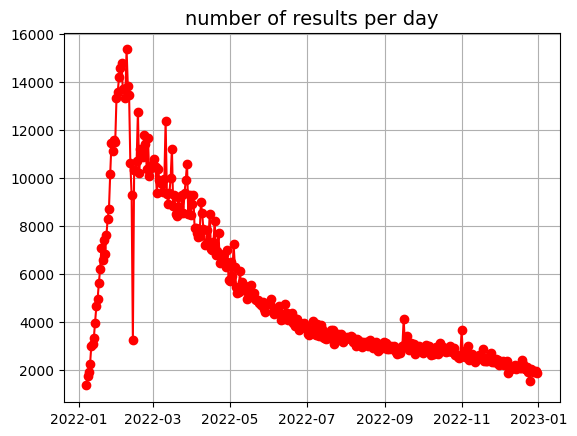

In [14]:
plt.plot(df['date'], df['num_hardmode'], color='red', marker='o')
plt.title('number of results per day', fontsize=14)
plt.grid(True)
plt.show()


In [15]:
print(df)

     Unnamed: 0       date  contest_num   word  num_results  num_hardmode  \
0             0 2022-12-31          560  manly        20380          1899   
1             1 2022-12-30          559  molar        21204          1973   
2             2 2022-12-29          558  havoc        20001          1919   
3             3 2022-12-28          557  impel        20160          1937   
4             4 2022-12-27          556  condo        20879          2012   
..          ...        ...          ...    ...          ...           ...   
354         354 2022-01-11          206  drink       153880          3017   
355         355 2022-01-10          205  query       107134          2242   
356         356 2022-01-09          204  gorge        91477          1913   
357         357 2022-01-08          203  crank       101503          1763   
358         358 2022-01-07          202  slump        80630          1362   

     in1  in2  in3  in4  ...  letter3  letter4  letter5  letter1_int  \
0  

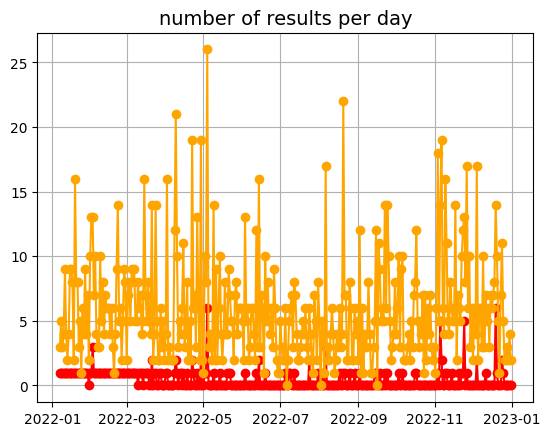

In [16]:
plt.plot(df['date'], df['in1'], color='red', marker='o')
plt.plot(df['date'], df['in2'], color='orange', marker='o')
# plt.plot(df['date'], df['in3'], color='yellow', marker='o')
# plt.plot(df['date'], df['in4'], color='green', marker='o')
# plt.plot(df['date'], df['in5'], color='blue', marker='o')
# plt.plot(df['date'], df['in6'], color='purple', marker='o')
# plt.plot(df['date'], df['over6'], color='black', marker='o')
plt.title('number of results per day', fontsize=14)
plt.grid(True)
plt.show()


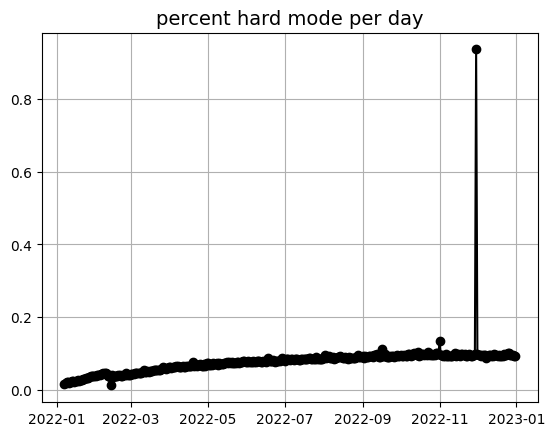

,Unnamed: 0,date,contest_num,word,num_results,num_hardmode,in1,in2,in3,in4,...,letter4,letter5,letter1_int,letter2_int,letter3_int,letter4_int,letter5_int,word_score,avg_num_guesses,percent_hard
31,31,2022-11-30,529,study,2569,2405,0,6,30,33,...,d,y,19,20,21,4,25,0.256991,4.03,0.936162


In [17]:
df["percent_hard"] = df.apply(
    lambda row: row["num_hardmode"]/row["num_results"], axis=1)

plt.plot(df['date'], df['percent_hard'], color='black', marker='o')
plt.title('percent hard mode per day', fontsize=14)
plt.grid(True)
plt.show()


df[df["percent_hard"] > 0.5]


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\AppData\Local\Temp\ipykernel_17784\644800489.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans['cluster'] = labels


Cluster 0
Mean number of word score results: 0.2956348607105927
Mean average number of guesses: 3.767207207207207


Cluster 1
Mean number of word score results: 0.26148627846965106
Mean average number of guesses: 4.773999999999999




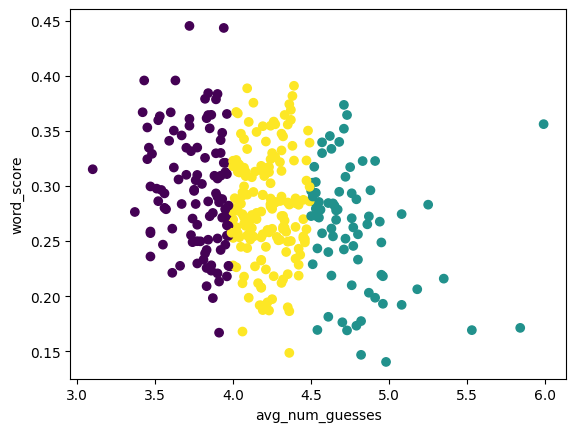

In [18]:
from sklearn.cluster import KMeans
import matplotlib.dates as dates
df_kmeans = df[["word_score", "avg_num_guesses"]]

kmeans = KMeans(n_clusters=3).fit(df_kmeans)

# Predict the cluster labels for each data point
labels = kmeans.predict(df_kmeans)

# Add the cluster labels to the data
df_kmeans['cluster'] = labels

# Print the summary statistics for each cluster
for i in range(2):
    cluster_data = df_kmeans[df_kmeans['cluster'] == i]
    print('Cluster', i)
    print('Mean number of word score results:',
          cluster_data['word_score'].mean())
    print('Mean average number of guesses:',
          cluster_data['avg_num_guesses'].mean())
    print('\n')

plt.scatter(df_kmeans['avg_num_guesses'],
            df_kmeans['word_score'], c=df_kmeans['cluster'])
plt.xlabel('avg_num_guesses')
plt.ylabel('word_score')
plt.show()


In [19]:
from scipy import stats
import numpy as np

# assuming your data is stored in a numpy array called "data"
# and the columns are ordered 1, 2, 3, ..., 7+

# calculate the Shapiro-Wilk test statistic and p-value
x = df[['in1','in2','in3','in4','in5','in6','over6']]

x = x.values.flatten()
result = stats.kstest(x, dist='gumbel')
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))


Statistic: 99.549
25.000: 0.472, data does not look normal (reject H0)
10.000: 0.634, data does not look normal (reject H0)
5.000: 0.754, data does not look normal (reject H0)
2.500: 0.874, data does not look normal (reject H0)
1.000: 1.034, data does not look normal (reject H0)


Fitting 110 distributions:  17%|█▋        | 19/110 [00:30<03:20,  2.20s/it]SKIPPED alpha distribution (taking more than 30 seconds)
SKIPPED betaprime distribution (taking more than 30 seconds)
SKIPPED erlang distribution (taking more than 30 seconds)
Fitting 110 distributions:  19%|█▉        | 21/110 [00:30<01:49,  1.23s/it]SKIPPED chi2 distribution (taking more than 30 seconds)
SKIPPED crystalball distribution (taking more than 30 seconds)
Fitting 110 distributions:  22%|██▏       | 24/110 [00:30<00:56,  1.54it/s]SKIPPED exponweib distribution (taking more than 30 seconds)
SKIPPED fisk distribution (taking more than 30 seconds)
SKIPPED f distribution (taking more than 30 seconds)
SKIPPED foldcauchy distribution (taking more than 30 seconds)
Fitting 110 distributions:  29%|██▉       | 32/110 [00:31<00:19,  4.00it/s]SKIPPED genexpon distribution (taking more than 30 seconds)
SKIPPED kstwo distribution (taking more than 30 seconds)
Fitting 110 distributions:  31%|███       | 34/110 [00:3

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
dweibull,57.786442,476.574414,-230793.627499,inf,0.223439,0.0
dgamma,59.125874,470.758382,-229971.228208,inf,0.230920,0.0
laplace_asymmetric,60.356067,460.828584,-229232.150907,inf,0.177112,0.0
laplace,60.404959,453.401518,-229213.577992,inf,0.213464,0.0
chi,60.993901,445.797370,-228854.860777,inf,0.169561,0.0


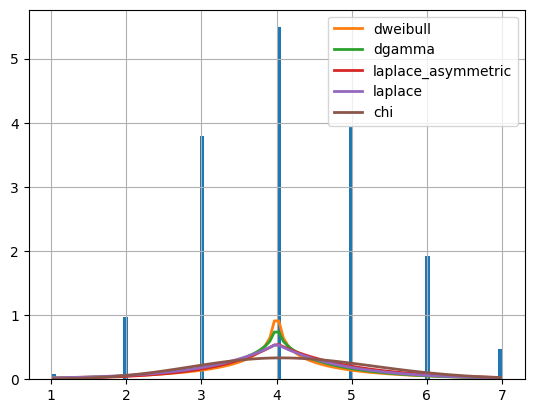

In [26]:
from fitter import Fitter, get_common_distributions, get_distributions
cols = ['in1', 'in2', 'in3', 'in4', 'in5', 'in6', 'over6']
in1 = [1 for _ in range(sum([length for length in df.in1.to_numpy()]))]
in2 = [2 for _ in range(sum([length for length in df.in2.to_numpy()]))]
in3 = [3 for _ in range(sum([length for length in df.in3.to_numpy()]))]
in4 = [4 for _ in range(sum([length for length in df.in4.to_numpy()]))]
in5 = [5 for _ in range(sum([length for length in df.in5.to_numpy()]))]
in6 = [6 for _ in range(sum([length for length in df.in6.to_numpy()]))]
over6 = [7 for _ in range(sum([length for length in df.over6.to_numpy()]))]

total_guesses = in1 + in2 + in3 + in4 + in5 + in6 + over6
result = stats.kstest(total_guesses, stats.norm.cdf)

plt.hist(total_guesses, bins = 7)
f = Fitter(total_guesses, distributions=get_distributions())
f.fit()
f.summary()


In [27]:
print(len(total_guesses))


35890


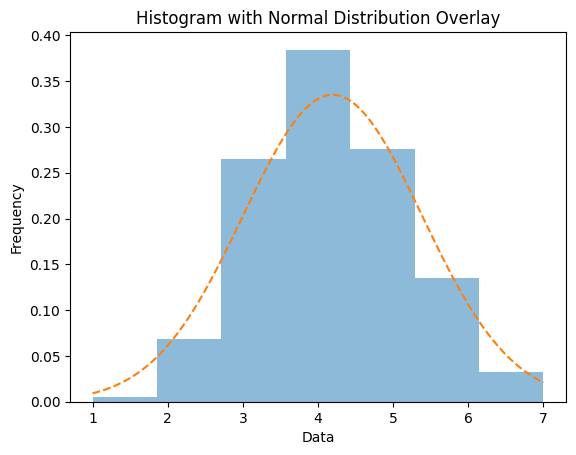

In [33]:
n, bins, patches = plt.hist(total_guesses, bins=7, density=True, alpha=0.5)

# Overlay a normal distribution on top of the histogram
mu, sigma = np.mean(total_guesses), np.std(total_guesses)
x = np.linspace(min(bins), max(bins), 100)
y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2))
plt.plot(x, y, '--')

# Add labels and a title to the plot
plt.xlabel('Data')
plt.ylabel('Frequency')
plt.title('Histogram with Normal Distribution Overlay')

# Display the plot
plt.show()


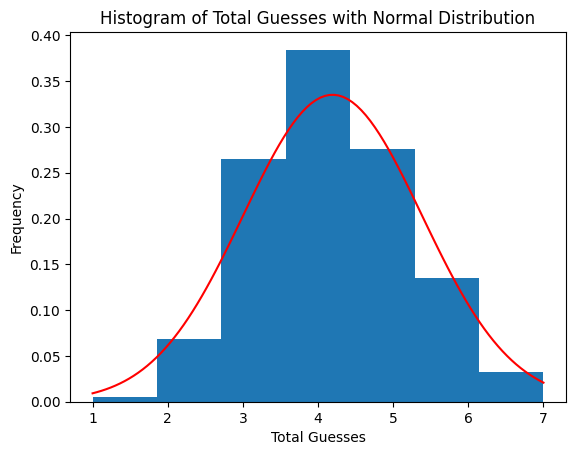

In [34]:
# Create histogram
plt.hist(total_guesses, bins=7, density=True)

# Add normal distribution curve
mu, sigma = np.mean(total_guesses), np.std(total_guesses)
x = np.linspace(min(total_guesses), max(total_guesses), 100)
y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))
plt.plot(x, y, color='red')

# Set labels and title
plt.xlabel('Total Guesses')
plt.ylabel('Frequency')
plt.title('Histogram of Total Guesses with Normal Distribution')

# Show plot
plt.show()
